# Machine Learning
---
### Lecture 9: Anomaly Detection and Clustering

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import matplotlib.pylab as plt

import matplotlib
nice_fonts = {
    "text.usetex": True,
    "font.family": "serif",
    "font.serif" : "Times New Roman",
    "lines.linewidth":3,
    "axes.titlesize":30,
    "axes.labelsize":24,
    "xtick.labelsize":14,
    "ytick.labelsize":14,
}
plt.style.use('seaborn-whitegrid')
matplotlib.rcParams.update(nice_fonts)
%matplotlib inline
plt.rcParams['figure.figsize'] = (8, 5)

## Learning Outcomes

- get familar with anomaly detection
    * Types of anomalies
    * Statistical approacehs
    * Model based approachs
- get familiar with clustering 
    * problem formulation
    * K-means

# Intro: Unsupervised Learning
--- 
* We do not have labels anymore
* But we would like to learn something usefull about the data:
    - Clusters: are there hidden classes?
    - Outliers: are there particularly unusual points?
    - Useful signal: is there any signal hidden in the noise?

In [10]:
from sklearn.datasets import make_moons, make_blobs
X = 4. * (make_moons(n_samples=255, noise=.05, random_state=0)[0] - np.array([0.5, 0.25]))
Out = np.concatenate([np.random.uniform(low=-6, high=-4, size=(1, 2)), np.random.uniform(low=4, high=6, size=(1, 2))], axis=0)

## Anomaly Detection

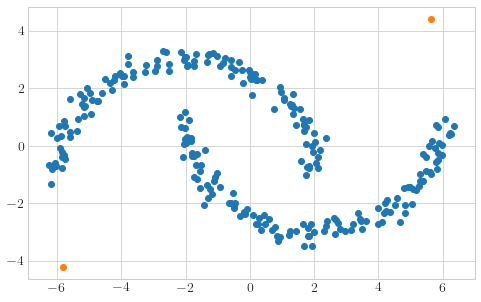

In [12]:
plt.scatter(X[:, 0], X[:, 1]);
plt.scatter(Out[:, 0], Out[:, 1]);

## Types of anomalies

- Global
- Contextual
- Collective

### Global Anomalies

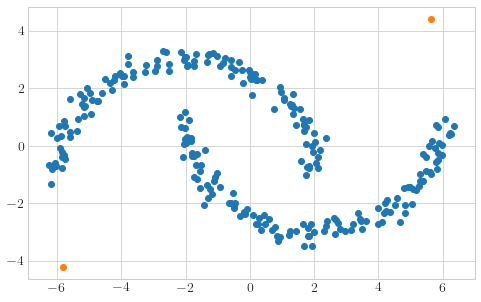

In [13]:
plt.scatter(X[:, 0], X[:, 1]);
plt.scatter(Out[:, 0], Out[:, 1]);

Point which deviates significantly from the test of the dataset. 

Also called point anomalies

### Contectual Anomalies

Also called conditional

<table><tr>
<td> <img src="img/9_1.jpg" alt="Drawing" style="width: 600px;"/> </td>
</tr></table>

“The temperature today is 28◦C. Is it exceptional (i.e., an outlier)?” 

It depends, for example, on the time and location! If it is in winter in Toronto, yes, it is an outlier. If it is a summer day in Toronto, then it is normal.

In a given data set, a data object is a contextual outlier if it deviates significantly with respect to a specific context of the object.

### Collective Anomalies

<table><tr>
<td> <img src="img/9_2.png" alt="Drawing" style="width: 600px;"/> </td>
</tr></table>

EEG example - individual points are not anolalous, but th esequence is.

Given a data set, a subset of data objects forms a collective outlier if the objects as a whole deviate significantly from the entire data set. Importantly, the individual data objects may not be outliers.

Example: If the shipment of an order is delayed, it may not be considered an outlier because, statistically, delays occur from time to time. However, you have to pay attention if 100 orders are delayed on a single day.

### Anomaly Detection Methods

- Statistical
- Proximity-based
- Clustering-Based

### Statistical 

- Make assumptions about *statistical* model by which normal points are generated

**Example:** use gaussian distribution
<table><tr>
<td> <img src="img/9_3.png" alt="Drawing" style="width: 400px;"/> </td>
</tr></table>

## Gaussian assumption

$$ x \sim \mathcal{N}(x| \mu,  \sigma)$$

Use *maximum likelihood* to estimate $\mu$ and $\sigma$:

$$
\hat{\mu} = \frac{1}{n}\sum_i x_i \\
\hat{\sigma}^2 = \frac{1}{n}\sum_i (x_i - \hat{\mu}) \\
$$

Region $\mu \pm 3\sigma$ contains $\approx 99.7\%$ of samples under gaussian assumption.

Thus, points outside this region can be identified as outliers. 

In [ ]:
X = np.random.randn(100, 2)*2
Out = np.random.uniform(low=5, high=7, size=(1, 2))
full_dset = np.concatenate([X, Out])

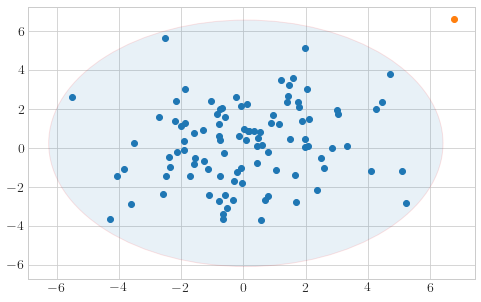

In [43]:
# example with the gaussian
plt.scatter(X[:, 0], X[:, 1]);
plt.scatter(Out[:, 0], Out[:, 1]);

circle1 = plt.Circle((X.mean(0)[0], X.mean(0)[1]), 3*X.std(0)[0], edgecolor='r', alpha=0.1)
plt.gca().add_patch(circle1);

### CUMSUM

Cumulative sum algorithm

* Used to detect abrupt change in the signal - change point detection
* Assuming that change happed at timestamp $n_c$:
    $$
    p = \prod_{i=0}^{n_c-1} p(x_i|\theta_0)\prod_{i=n_c}^{N} p(x_i|\theta_1)
    $$

* Based on *log-likelihood ratio*:
$$
L_{N, n_c} = \log \frac{\prod_{i=0}^{n_c-1} p(x_i|\theta_0)\prod_{i=n_c}^{N} p(x_i|\theta_1)}{\prod_{i=0}^{N} p(x_i|\theta_0)} = \\
 \log \frac{\prod_{i=n_c}^{N} p(x_i|\theta_1)}{\prod_{i=n_c}^{N} p(x_i|\theta_0)} = \sum_{n=n_c}^N \log \frac{p(x_i|\theta_1)}{p(x_i|\theta_0)}
$$



$n_c$ is a change time if corresponding value of the log-likelihood ratio is larger than some predifined threshold. 


### On practice

Keep track of cumulative sum:

$$
S_k = \sum_{i=0}^k \log \frac{p(x_i|\theta_1)}{p(x_i|\theta_0)}
$$

The *log-likelihood ration* is then equal to:

$$
L_{N, n_c} = S_N - S_{n_c-1}
$$


Therefore, our estimation of the change time:
$$
\hat{n_c} = \arg\min S_{n_c-1}
$$

## Proximity-base methods


- Based on Nearest Neigbours
- Point is an outlier if its distance to *nearest neigbours* highly deviates from the same metric of other points

<table><tr>
<td> <img src="img/9_4.png" alt="Drawing" style="width: 300px;"/> </td>
</tr></table>

## Clustering-based methods

- Normal points belong to large and dense clusters
- Outliers do not belong to any clusters or form a small and sparce ones

<table><tr>
<td> <img src="img/9_5.jpg" alt="Drawing" style="width: 500px;"/> </td>
</tr></table>

### Outlier Detection as a Classification Problem

* Build a classification boundary as if we had 1 class

* One-class SVM


### SVM objective

\begin{equation}
\begin{cases}
\min_{x, \xi_n} \frac{1}{2}\|w\|^2 + C \sum_n \xi_n\\
y_n \langle x_n, w \rangle \geq 1 - \xi_n\\
\xi_n \geq 0
\end{cases}
\end{equation}

### One-class SVM objective
\begin{equation}
\begin{cases}
\min_{x, \xi_n, \rho} \frac{1}{2}\|w\|^2 + \frac{1}{\nu N} \sum_n \xi_n - \rho\\
\langle x_n, w \rangle \geq \rho - \xi_n\\
\xi_n \geq 0
\end{cases}
\end{equation}

With the resulting decision boundary:

$$
a(x) = \text{sign}( \langle x_n, w \rangle - \rho)
$$

We're looking for a hyperplane which 
- Sepaprates the most objects of the dataset from 0 (penalty)
- Has large margin
- As far as possible from 0 (controlled by \rho)
- We can still do the kernel trick

<table><tr>
<td> <img src="img/9_6.png" alt="Drawing" style="width: 500px;"/> </td>
</tr></table>

### Isolation Forest

* We can say that the more often 2 objects fall in the same leaf - the "closer" they are
<table><tr>
<td> <img src="img/9_7.png" alt="Drawing" style="width: 500px;"/> </td>
</tr></table>

### Isolation Forest

* Build a tree with $N$ *random* trees (max depth, min objects in leaf)
* Find distance from the object to the root (in each tree)
* The smaller this distance is - the more anomalous the object is

## Clustering: applications

- Marketing: looking for similar clients
- Social sciences: looking for communities, similar opinions

## Clustering

* Given $ X = \{x_n\}_{n=1}^N$
* Find algorithm $a: \mathbb{X} \rightarrow \{1, \dots, K\}$

What is a cluster?
* Datapoints in a cluster are more similar to each other than to other clusters
* Clusters are usually defined by their centers, and potentially by other shape parameters.

Today:
* We will consider: k-means

### $K$-Means

$K$-Means is the simplest example of a clustering algorithm.
* The algorithm seeks to find $K$ hidden clusters in the data.
* Each cluster is characterized by its centroid (its mean).    
* We seek centroids $c_k$ such that the distance between the points and their closest centroid is minimized

### How to train?
1. Fix cluster centroids $c_k$ (e.g. random). 
We can now assign objects to the custers based on their distance to $c_k$
$$
a(x_i) = \arg\min_k \rho(x_i, c_k)
$$

2. Find new centroids $c_k$ based on the objects in each cluster:

$$
c_k = \frac{1}{N_k}\sum_i[a(x_i) == k]x_i
$$

- Repeat 1 and 2 until convergence

<center><img width=30% src="img/9_8.gif"></center>

In [46]:
from sklearn import datasets
np.random.seed(0)
X, y = datasets.make_blobs(centers=4)

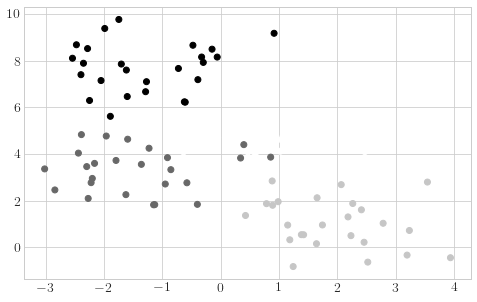

In [49]:
plt.scatter(X[:,0], X[:,1], c=y)

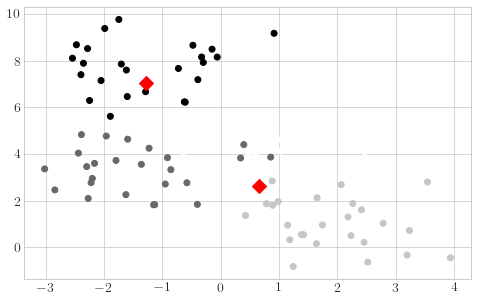

In [51]:
from sklearn import cluster
model = cluster.KMeans(n_clusters=2)
model.fit(X)

plt.scatter(X[:,0], X[:,1], c=y)
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], marker='D', c='r', s=100);

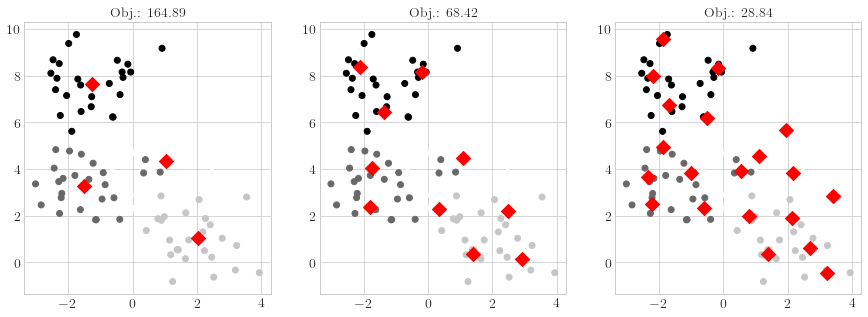

In [55]:
Ks = [4, 10, 20]
f, axes = plt.subplots(1,3, figsize=(15, 5))
for k, ax in zip(Ks, axes):
    model = cluster.KMeans(n_clusters=k)
    model.fit(X)
    ax.scatter(X[:,0], X[:,1], c=y)
    ax.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], marker='D', c='r', s=100)
    ax.set_title('Obj.: %.2f' % -model.score(X), fontsize=14)

# The "Elbow" Method

The Elbow method is a way of tuning hyper-parameters in unsupervised learning.
* We plot the objective function as a function of the hyper-parameter $K$.
* Fins the point when the rate of decrease substantially slows down.
* It is a good guess for the hyperparameter.

Text(0, 0.5, 'Objective Function Value')

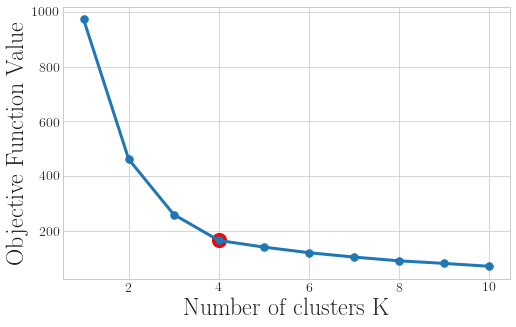

In [56]:
Ks, objs = range(1,11), []
for k in Ks:
    model = cluster.KMeans(n_clusters=k)
    model.fit(X)
    objs.append(-model.score(X))

plt.plot(Ks, objs, '.-', markersize=15)
plt.scatter([4], [objs[3]], s=200, c='r')
plt.xlabel("Number of clusters K")
plt.ylabel("Objective Function Value")

### Limitations

* Clustering can get stuck in local minima. Initial centroids position is very inportant.
* Measuring clustering quality is hard and relies on heuristics
* Cluster assignment is binary and doesn't estimate confidence

### Other clustring methods
 * Hierarchical clustering
 <center><img width=30% src="img/9_9.png"></center>
 * Graph-based methods
   <center><img width=30% src="img/9_10.png"></center>

## Learning Outcomes

- get familar with anomaly detection
    * Types of anomalies
    * Statistical approacehs
    * Model based approachs
- get familiar with clustering 
    * problem formulation
    * K-means